<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
%pip install requests


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

# Replace this with your dataset URL
path = URL

# Download the file
download(path, "dataset.csv")

---


# Test Environment


In [22]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

file_path = 'dataset.csv'
# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Step 2: Print the first 5 rows of the DataFrame
#print(df.head())

# Basic DataFrame check
def basic_dataframe_check(df):
    # Show the size of the dataframe (rows, columns)
    print("Size of DataFrame: ", df.shape)
    
    # Check for duplicate records
    duplicate_count = df.duplicated().sum()
    print("Number of duplicate records: ", duplicate_count)
    
    #if duplicate_count > 0:
    #    print("Duplicate records:")
    #    print(df[df.duplicated()])
    
    # Check for missing values in each column
    print("\nMissing values in each column:")
    print(df.isnull().sum())

# Run the basic check
#basic_dataframe_check(df)
# Function to remove duplicate records
def remove_duplicates(df):
    # Remove duplicates and keep the first occurrence
    df_cleaned = df.drop_duplicates(keep='first')
    
    # Display the size of the DataFrame after removing duplicates
    #print(f"Size of DataFrame after removing duplicates: {df_cleaned.shape}")
    
    return df_cleaned

# Example usage:
df_cleaned = remove_duplicates(df)

# Function to impute numerical missing values with the column average
def impute_missing_values(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Impute missing values in numerical columns with the column average
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            avg_value = df[col].mean()
            df.loc[df[col].isnull(), col] = avg_value
            print(f"Imputed missing values in '{col}' with the average: {avg_value}")
    
    return df

# Example usage:

print("Cleaned df")
basic_dataframe_check(df_cleaned)
df_imputed = impute_missing_values(df_cleaned)
print("Imputed df")
basic_dataframe_check(df_imputed)

Cleaned df
Size of DataFrame:  (17812, 9)
Number of duplicate records:  0

Missing values in each column:
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64
Imputed missing values in 'tax' with the average: 113.31472850805773
Imputed df
Size of DataFrame:  (17812, 9)
Number of duplicate records:  0

Missing values in each column:
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64


Outliers in 'year':
         model  year transmission  mileage fuelType    tax   mpg  engineSize  \
13464    C-MAX  2008       Manual    27930   Petrol  235.0  39.8         1.8   
13468   Fiesta  2009       Manual    62000   Petrol  145.0  49.6         1.2   
13480   Fiesta  2008       Manual   116000   Diesel   20.0  67.3         1.6   
13485   Mondeo  2009    Automatic   110000   Diesel  300.0  39.8         2.0   
13502     Kuga  2009       Manual   117000   Diesel  235.0  44.1         2.0   
...        ...   ...          ...      ...      ...    ...   ...         ...   
17755   Fiesta  2007       Manual    79000   Petrol  160.0  41.5         1.2   
17758    Focus  2006    Automatic    70730   Petrol  260.0  36.7         1.6   
17760    C-MAX  2007       Manual    82000   Petrol  235.0  39.8         1.8   
17761    Focus  2005    Automatic    87908   Petrol  265.0  36.7         1.6   
17816   Fiesta  2009       Manual    49500   Petrol  150.0  49.6         1.4   

       price  
1346

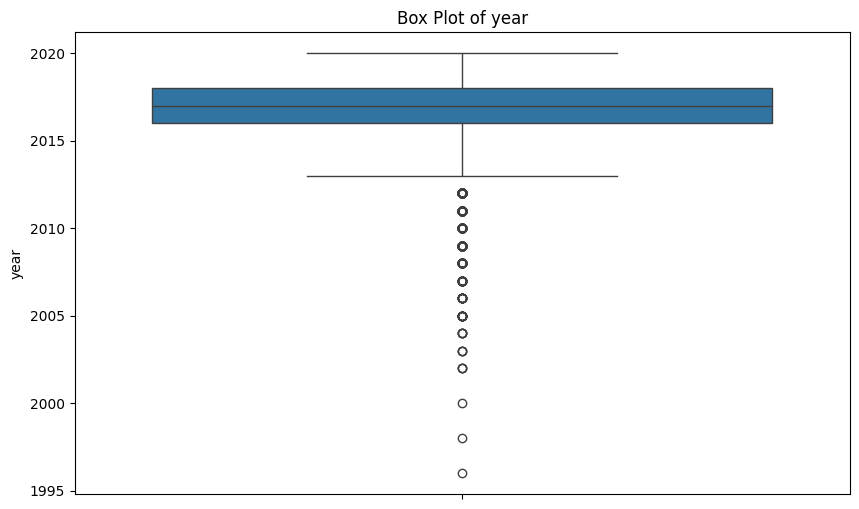

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers using IQR
def find_outliers(df, column):
    # Calculate the first (Q1) and third (Q3) quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for detecting outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Outliers in '{column}':")
    print(outliers)
    df_cleaned = df[(df[column] <= upper_bound)]
    
    print(f"Removed outliers from '{column}'")
    print(f"Number of rows before removing outliers: {df.shape[0]}")
    print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")
    
    return df_cleaned

# Function to show box plot for visualizing outliers
def show_box_plot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.show()


# Specify the column for which you want to detect outliers
column_name = 'year'  # Example: replace 'price' with your actual column name

# Find and show the outliers
df_cleaned = find_outliers(df_imputed, column_name)

# Show box plot for visualizing outliers
show_box_plot(df_cleaned, column_name)


In [32]:

# Function to find the top 5 attributes with the highest correlation to the target attribute
def top_correlated_attributes(df, target_column):
    # Check for non-numeric (categorical) columns
    non_numeric_cols = df.select_dtypes(include=['object']).columns
    
    # Apply one-hot encoding to convert categorical columns to numeric
    df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)
    
    # Calculate the correlation matrix on the encoded DataFrame
    correlation_matrix = df_encoded.corr()
    
    # Get correlations with the target attribute, sort values, and exclude the target itself
    target_correlation = correlation_matrix[target_column].drop(target_column).sort_values(ascending=False)
    
    # Get the top 5 attributes with the highest correlation
    top_5_attributes = target_correlation.head(5)
    
    print("Top 5 attributes with the highest correlation to '{}':".format(target_column))
    print(top_5_attributes)
    
    return top_5_attributes


# Specify the target attribute (replace 'target' with your actual target column name)
target_column = 'price' 

# Get the top 5 correlated attributes
top_5_correlated = top_correlated_attributes(df_cleaned, target_column)


Top 5 attributes with the highest correlation to 'price':
year              0.635715
engineSize        0.411451
tax               0.405970
model_ Kuga       0.281926
model_ Mustang    0.267520
Name: price, dtype: float64


In [45]:


# Function to count the number of entries for each unique value of a specific attribute
def count_unique_values(df, column_name):
    # Count the occurrences of each unique value in the specified column
    value_counts = df[column_name].value_counts()
    
    print(f"Count of unique values in column '{column_name}':")
    print(value_counts)
    
    return value_counts


# Specify the column name (replace 'attribute' with your actual column name)
column_name = 'year'  

# Get the count of unique values in the specified column
unique_value_counts = count_unique_values(df_cleaned, column_name)


Count of unique values in column 'year':
year
2017    4854
2018    3982
2019    3152
2016    2314
2015    1355
2014     799
2013     606
2020     252
2012     115
2011      94
2009      91
2010      67
2008      56
2007      32
2005      16
2006      13
2004       4
2003       3
2002       3
1998       1
1996       1
2000       1
2060       1
Name: count, dtype: int64


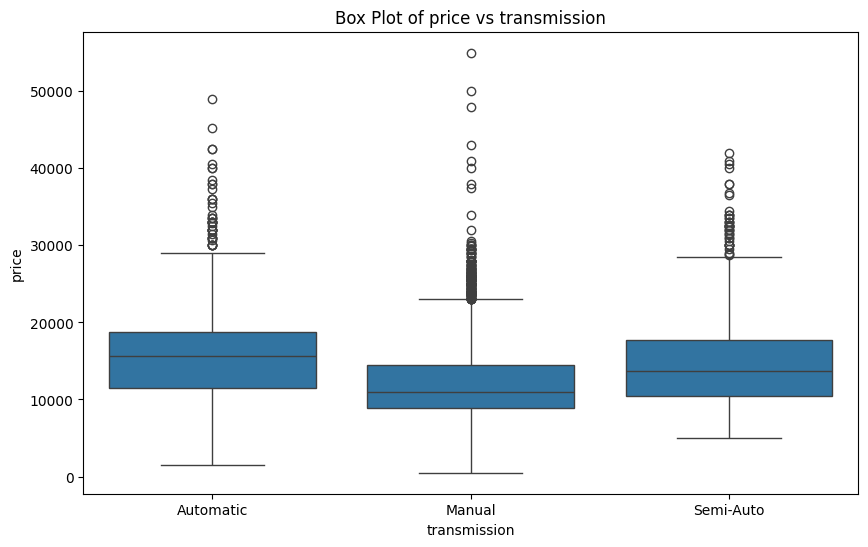

In [34]:


# Function to create a box plot between source and target attributes
def create_box_plot(df, source_column, target_column):
    # Create the box plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=source_column, y=target_column, data=df)
    
    # Add labels and title
    plt.title(f'Box Plot of {target_column} vs {source_column}')
    plt.xlabel(source_column)
    plt.ylabel(target_column)
    
    # Show the plot
    plt.show()

# Load the dataset

# Specify the source and target columns (replace with actual column names)
source_column = 'transmission'  # Example: replace 'fuelType' with your actual source column
target_column = 'price'     # Example: replace 'price' with your actual target column

# Create the box plot
create_box_plot(df_cleaned, source_column, target_column)


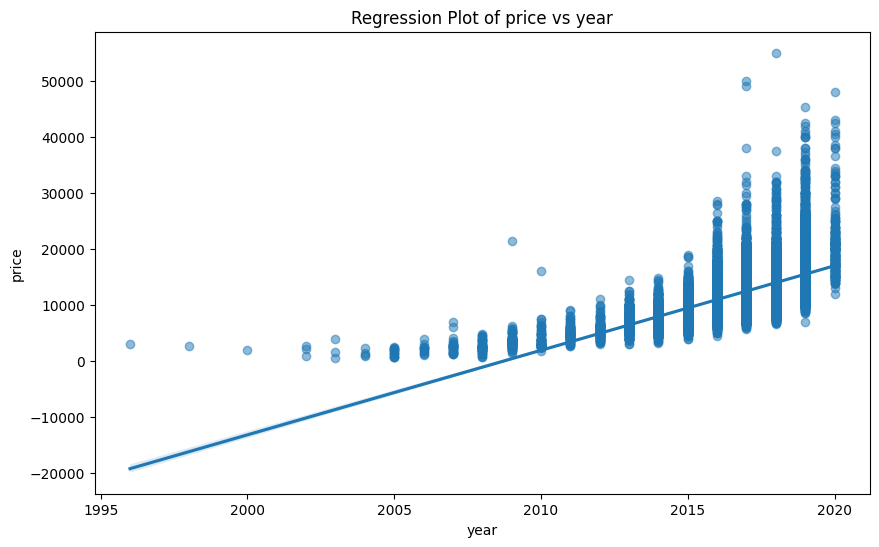

In [60]:
# Function to create a regression plot between source and target attributes
def create_regression_plot(df, source_column, target_column):
    # Create the regression plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.regplot(x=source_column, y=target_column, data=df, scatter_kws={'alpha':0.5})
    
    # Add labels and title
    plt.title(f'Regression Plot of {target_column} vs {source_column}')
    plt.xlabel(source_column)
    plt.ylabel(target_column)
    
    # Show the plot
    plt.show()


# Specify the source and target columns (replace with actual column names)
source_column = 'year'  # Example: replace 'mileage' with your actual source column
target_column = 'price'    # Example: replace 'price' with your actual target column

# Create the regression plot
create_regression_plot(df_cleaned, source_column, target_column)


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to fit linear regression and calculate R² and MSE
def linear_regression_model(df, source_column, target_column):
    # Split the data into source (X) and target (y)
    X = df[[source_column]]  # Source variable (independent)
    y = df[target_column]    # Target variable (dependent)
    
    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R² value
    r2 = r2_score(y_test, y_pred)
    
    # Calculate MSE value
    mse = mean_squared_error(y_test, y_pred)
    
    # Print the results
    print(f"R² value: {r2}")
    print(f"MSE value: {mse}")
    
    return model


# Specify the source and target columns (replace with actual column names)
source_column = 'year'  # Example: replace 'mileage' with your actual source column
target_column = 'price'    # Example: replace 'price' with your actual target column

# Fit the linear regression model and calculate R² and MSE
linear_regression_model(df_cleaned, source_column, target_column)


R² value: 0.41857525144534724
MSE value: 13365736.29386816


LinearRegression()

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
